In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")

In [2]:
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [3]:
data = pd.read_csv("Dataset.csv")

In [4]:
data.head()

,Video ID,Comment ID,comments
0,H5UlTdyQTng,Ugz04ohUyyJPi7hzYe94AaABAg,Girl on the left at 0 49 This was her...
1,H5UlTdyQTng,UgwWWWvsO96ZqznTSLh4AaABAg,The Oxford vaccine is using another vacc...
2,H5UlTdyQTng,Ugy5uxxtnhyCltlyvxV4AaABAg,How is this even possible when there ha...
3,H5UlTdyQTng,UgxnnPf68FvG3qneSLN4AaABAg,Do not be a guinea pig and certainly d...
4,H5UlTdyQTng,UgyYYNEwDpM3RUDEPqR4AaABAg,Yeah no thanks 23 years old and perfe...


In [5]:
data.shape

(56, 3)

In [6]:
data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [7]:
data.head()

,Video ID,Comment ID,comments,polarity
0,H5UlTdyQTng,Ugz04ohUyyJPi7hzYe94AaABAg,Girl on the left at 0 49 This was her...,0.000000
1,H5UlTdyQTng,UgwWWWvsO96ZqznTSLh4AaABAg,The Oxford vaccine is using another vacc...,0.000000
2,H5UlTdyQTng,Ugy5uxxtnhyCltlyvxV4AaABAg,How is this even possible when there ha...,-0.300000
3,H5UlTdyQTng,UgxnnPf68FvG3qneSLN4AaABAg,Do not be a guinea pig and certainly d...,-0.107143
4,H5UlTdyQTng,UgyYYNEwDpM3RUDEPqR4AaABAg,Yeah no thanks 23 years old and perfe...,0.166667


In [8]:
data = data.sample(frac=1).reset_index(drop=True)

In [9]:
data['pol_cat']  = 0

In [10]:
# data['pol_cat'][data.polarity == 0] = 0
data['pol_cat'][data.polarity > 0] = 1
data['pol_cat'][data.polarity <= 0] = -1

In [11]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,H5UlTdyQTng,UgxNGmG2cno9nsBFxc94AaABAg,GOT IT,0.0,-1
1,H5UlTdyQTng,UgyWhBPnvqKEpT2iVfl4AaABAg,Don t let them vaccinate you they re ...,0.0,-1
2,H5UlTdyQTng,UgwO59GW5HF-5b2-U-94AaABAg,This video is a sigh of relief,0.0,-1
3,H5UlTdyQTng,UgxKKJ7WQs3r_s9r6d94AaABAg,When is our government going to show pr...,0.0,-1
4,H5UlTdyQTng,Ugxq83Fxhcu-cOjRcRN4AaABAg,Like the Flu vaccine eradicated Flu,0.0,-1


In [12]:
data['pol_cat'].value_counts()

-1    39
 1    17
Name: pol_cat, dtype: int64

In [13]:
data_pos = data[data['pol_cat'] == 1]
data_pos = data_pos.reset_index(drop = True)

data_neg = data[data['pol_cat'] == -1]
data_neg = data_neg.reset_index(drop = True)

# data_neutral = data[data['pol_cat'] == 0]
# data_neutral = data_neutral.reset_index(drop = True)

In [14]:
data_pos.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,H5UlTdyQTng,UgxyHaXNyPqKKoo9tOR4AaABAg,Is vaccine ready Plss tell me,0.200000,1
1,H5UlTdyQTng,UgzIhbhtRLQSwbGPM2R4AaABAg,I am the first liker,0.250000,1
2,H5UlTdyQTng,UgxJUf-Qr5tHnuR50uN4AaABAg,Beast system starts in Briton have fun ...,0.300000,1
3,H5UlTdyQTng,UgyYYNEwDpM3RUDEPqR4AaABAg,Yeah no thanks 23 years old and perfe...,0.166667,1
4,H5UlTdyQTng,UgwWjheNUyD5cuW2yvJ4AaABAg,If you want to take the vaccine then t...,0.333333,1


In [15]:
data_pos.shape

(17, 5)

In [16]:
data_neg.head()

,Video ID,Comment ID,comments,polarity,pol_cat
0,H5UlTdyQTng,UgxNGmG2cno9nsBFxc94AaABAg,GOT IT,0.0,-1
1,H5UlTdyQTng,UgyWhBPnvqKEpT2iVfl4AaABAg,Don t let them vaccinate you they re ...,0.0,-1
2,H5UlTdyQTng,UgwO59GW5HF-5b2-U-94AaABAg,This video is a sigh of relief,0.0,-1
3,H5UlTdyQTng,UgxKKJ7WQs3r_s9r6d94AaABAg,When is our government going to show pr...,0.0,-1
4,H5UlTdyQTng,Ugxq83Fxhcu-cOjRcRN4AaABAg,Like the Flu vaccine eradicated Flu,0.0,-1


In [17]:
data_neg['comments'][15]

"They've  lied  to  us  about  the  numbers  of  covid  deaths    it  has  been  proven    And  even  with  their  lies  it  is  not  that  high  of  a  death  percentage    There's  no  way  on  earth  that  the  people  will  just  lie  down  and  take  it    Only  the  mindless  sheep  "

-1    39
 1    17
Name: pol_cat, dtype: int64

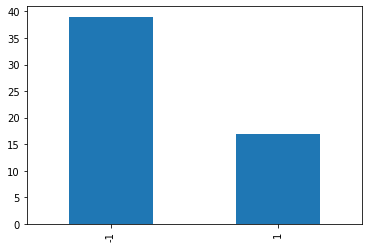

In [18]:
data.pol_cat.value_counts().plot.bar()
data.pol_cat.value_counts()

In [19]:
data['comments'] = data['comments'].str.lower()

In [20]:
data['comments'].head()

0                                              got  it
1    don  t  let  them  vaccinate  you    they  re ...
2           this  video  is  a  sigh  of  relief      
3    when  is  our  government  going  to  show  pr...
4         like  the  flu  vaccine  eradicated  flu    
Name: comments, dtype: object

In [21]:
data.describe()

,polarity,pol_cat
count,56.000000,56.000000
mean,0.016250,-0.392857
std,0.213017,0.927922
min,-0.500000,-1.000000
25%,-0.033750,-1.000000
50%,0.000000,-1.000000
75%,0.122991,1.000000
max,0.800000,1.000000


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Video ID    56 non-null     object 
 1   Comment ID  56 non-null     object 
 2   comments    56 non-null     object 
 3   polarity    56 non-null     float64
 4   pol_cat     56 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.3+ KB


In [23]:
data['comments'][0]

'got  it'

In [24]:
data['comments'][0].strip()

'got  it'

In [25]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
from nltk.corpus import stopwords
from nltk import word_tokenize
import string
import re
import nltk

In [28]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [29]:
stop_words = set(stopwords.words('english'))

In [30]:
data['comments'] = data['comments'].str.strip()

In [31]:
train = data.copy()

In [32]:
train['comments'] = train['comments'].str.strip()

In [33]:
train['comments'][0]

'got  it'

In [34]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [35]:
data['stop_comments'] = data['comments'].apply(lambda x : remove_stopwords(x))

In [36]:
data.head()

,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,H5UlTdyQTng,UgxNGmG2cno9nsBFxc94AaABAg,got it,0.0,-1,got
1,H5UlTdyQTng,UgyWhBPnvqKEpT2iVfl4AaABAg,don t let them vaccinate you they re ...,0.0,-1,let vaccinate gon na microchip trust trusting ...
2,H5UlTdyQTng,UgwO59GW5HF-5b2-U-94AaABAg,this video is a sigh of relief,0.0,-1,video sigh relief
3,H5UlTdyQTng,UgxKKJ7WQs3r_s9r6d94AaABAg,when is our government going to show pr...,0.0,-1,government going show proof virus existing the...
4,H5UlTdyQTng,Ugxq83Fxhcu-cOjRcRN4AaABAg,like the flu vaccine eradicated flu,0.0,-1,like flu vaccine eradicated flu


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [39]:
X_train.shape

(44,)

In [40]:
X_test.shape

(12,)

In [41]:
data['pol_cat'].value_counts()

-1    39
 1    17
Name: pol_cat, dtype: int64

In [42]:
# Applying Logistic Regression

from sklearn.feature_extraction.text import CountVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [44]:
tf_train.shape

(44, 347)

In [45]:
print(vect.vocabulary_)

{'vaccine': 323, 'laaad': 146, 'stay': 274, 'home': 128, 'need': 192, 'silly': 262, 'jab': 143, 'know': 145, 'takes': 285, 'amazing': 15, 'amount': 16, 'control': 54, 'utter': 319, 'ignorance': 135, 'news': 196, 'reader': 240, 'project': 228, 'vomit': 328, 'mouths': 187, 'keeping': 144, 'straight': 278, 'face': 95, 'like': 158, 'flu': 102, 'eradicated': 86, 'planned': 218, 'everyone': 88, 'involved': 142, 'held': 126, 'accoutable': 9, 'common': 48, 'law': 149, 'people': 212, 'charge': 40, 'concent': 49, 'lab': 147, 'rats': 238, 'ready': 241, 'plss': 219, 'tell': 288, 'bill': 28, 'gates': 107, 'behind': 26, 'vaccination': 322, 'program': 227, 'announced': 17, 'could': 57, 'reduce': 242, 'world': 337, 'population': 220, 'using': 318, 'vaccines': 324, '004': 0, 'worldwide': 338, 'died': 77, 'covid': 59, 'including': 137, 'high': 127, 'false': 96, 'positives': 221, 'tested': 289, 'word': 335, 'deal': 64, 'alarms': 13, 'contract': 53, 'business': 35, 'bargain': 24, 'show': 259, 'money': 183

In [46]:
vocab = vect.vocabulary_

In [47]:
# import the logistic regression classifer and fit on the training dataset

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

In [48]:
#Accuracy Score on Training Dataset

lr.score(tf_train,y_train)

0.9545454545454546

In [49]:
# Accuracy score on test dataset i.e got from the splitting

lr.score(tf_test,y_test)

0.6666666666666666

In [50]:
# Make predictions on the test dataset i.e. unseen data to the model

expected = y_test
predicted = lr.predict(tf_test)

In [51]:
# plot confusion matrix for the test dataset

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

[[0 4]
 [0 8]]


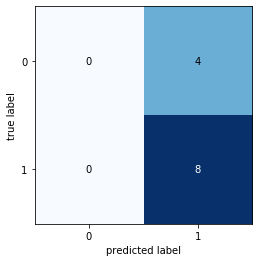

In [52]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [53]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.67      1.00      0.80         8
           1       0.00      0.00      0.00         4

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



In [54]:
# Find the F1 score

from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.4